# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We will be analyzing the No-Show Appointment data set. This data is derived from 100,000 medical appoinments in Brazil. We will be using this data to analyze if there is a difference in characteristics between a patient that shows up for their appointment versus the patient that does not. The "Patient ID" and "Appointment ID" are used to identify the patient information with the correlated appointment date. "Gender" and "Age" are used as patient identifiers without sharing personal information. The "ScheduledDay" is the date the patient scheduled the appointment on. "AppointmentDay" is the actual appointment day that the appointment is scheduled for. "Neighbourhood" represents the location of the hospital in Brazil. "Scholarship" is if a patient is enrolled in the welfare program "Bolsa Familia". "Hipertension", "Diabetes", "Alcoholism", and "Handcap" will be used to identify if a patient has a illness or disability. "SMS Recieved" shows if a patient has opted in for recieving a text message notifcation for their appointment. "No-Show" is if the patient has missed or shown up for their appointment; "Yes" if the appointment was missed and "No" if the patient did arrive. 



### Question(s) for Analysis
A few questions that will be used for analysis are: 

- If the patient has a illness or disability are they less likely to be a no-show? 
- What is the average age of a person who is a No-show? 
- Does the liklihood of a No-show decrease if the patient recieved a SMS notification? 
- Does a patient with a scholarship "No-Show" their appointments less than someone who uses a different method of payment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

In [2]:
df = pd.read_csv('noshow_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The first row of the chart represents the characteristics of the patient and their appointment. There are some spelling errors in the charastic's column of "Handcap" and "Hipertension" that will need to be corrected. We're able to see who has a scholarship, illness, disability, and hasrecieved a SMS notification based on the 1's and 0's in each specific column.

In [3]:
df.shape

(110527, 14)

There are 110,527 appoinments with 14 identifying characteristics

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The average age of patients are mostly over 37 with the youngest being a  a pregnant woman or unborn child and the oldest 115. The majority of patients are over 18. Most patients don't have a scholarship. Many of the patients do not have an illness or disability. The most popular illness for a patient to have is Hipertension. 32% of the patients have opted in to recieve a SMS notifcation.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


"Handcap" and "Hipertension" are spelled incorrectly and should be replaced with "Handicap" and "Hypertension". "AppointmentID" and "PatientID" arn't necessary identifiers and can be dropped from the data set.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
df.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)

The appointmentID ,patientID, and Neighborhood are not needed to identify patient information.

In [7]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


Columns "Hipertension" and "Handcap" will need to be renamed to reflect correct spelling.

In [8]:
df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension', 'No-show':'No_show'},inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


The data type for 'AppointmentDay' and 'ScheduledDay' will need to be changes to datetime64 to reflect exact date and time. The data type for 'Age' will need to be corrected to float64 to show any patients that are infants.

In [9]:
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')
df['Age'] = df['Age'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null float64
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 9.3+ MB


In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56.0,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62.0,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8.0,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56.0,0,1,1,0,0,0,No


In [11]:
df.AppointmentDay.max()

Timestamp('2016-06-08 00:00:00')

Most appointments are scheduled for 6/8/2016.

In [12]:
date = df.sort_values(["ScheduledDay","AppointmentDay"], ascending = False)
date.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
87223,F,2016-06-08 20:07:23,2016-06-08,27.0,0,0,0,0,0,0,No
87219,F,2016-06-08 19:58:52,2016-06-08,30.0,0,0,0,0,0,0,No
88147,M,2016-06-08 19:33:23,2016-06-08,27.0,0,0,0,0,0,0,No
88146,F,2016-06-08 19:32:56,2016-06-08,43.0,0,0,0,0,0,0,No
92442,M,2016-06-08 19:32:25,2016-06-08,54.0,0,0,0,0,0,0,No
85792,M,2016-06-08 19:14:25,2016-06-08,58.0,0,0,0,0,0,0,No
103747,M,2016-06-08 19:08:20,2016-06-08,32.0,0,0,0,0,0,0,No
88144,F,2016-06-08 19:02:15,2016-06-08,49.0,0,0,0,0,0,0,No
97294,M,2016-06-08 18:52:20,2016-06-08,20.0,1,0,0,0,0,0,No
104871,F,2016-06-08 18:34:11,2016-06-08,46.0,0,0,0,0,0,0,No


In [13]:
date = df.sort_values(["ScheduledDay","AppointmentDay"], ascending = True)
date.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
3764,F,2015-11-10 07:13:56,2016-05-04,51.0,0,0,0,0,0,1,No
46292,M,2015-12-03 08:17:28,2016-05-02,34.0,0,1,0,0,0,1,Yes
102795,F,2015-12-07 10:40:59,2016-06-03,27.0,1,0,0,0,0,1,Yes
102797,F,2015-12-07 10:42:42,2016-06-03,48.0,0,1,1,0,0,1,No
102796,F,2015-12-07 10:43:01,2016-06-03,80.0,0,1,1,0,0,1,No
102799,F,2015-12-07 10:43:17,2016-06-03,74.0,0,1,1,0,0,1,No
102786,M,2015-12-07 10:43:34,2016-06-03,67.0,0,1,1,0,0,0,No
102791,F,2015-12-07 10:43:50,2016-06-03,77.0,0,1,1,0,0,1,No
102792,M,2015-12-07 10:44:07,2016-06-03,73.0,0,1,1,0,1,0,Yes
102789,F,2015-12-07 10:44:25,2016-06-03,60.0,0,1,1,0,0,1,No


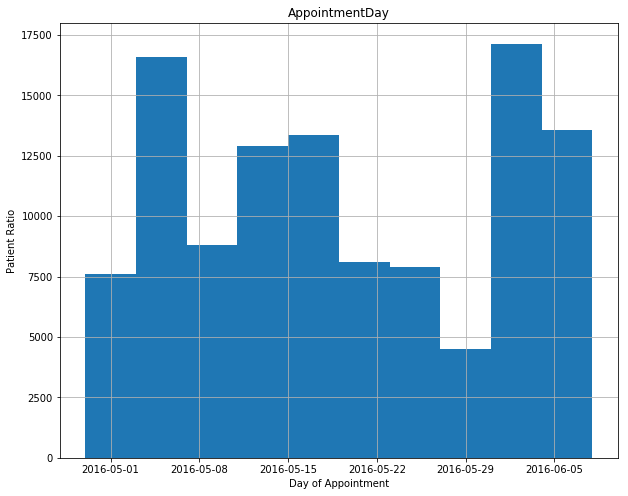

In [14]:
df.AppointmentDay.hist(figsize=(10,8))
plt.title('AppointmentDay')
plt.xlabel('Day of Appointment')
plt.ylabel ('Patient Ratio');

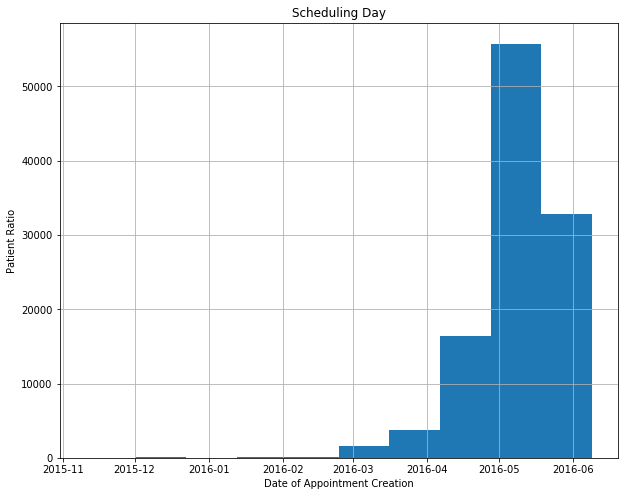

In [15]:
df.ScheduledDay.hist(figsize=(10,8))
plt.title('Scheduling Day')
plt.xlabel('Date of Appointment Creation')
plt.ylabel ('Patient Ratio');

From the dataframe it shows that the appointments are being scheduled 6 months out but there is a lack of information for days that the appointments are being scheduled versus the actual appointment day.

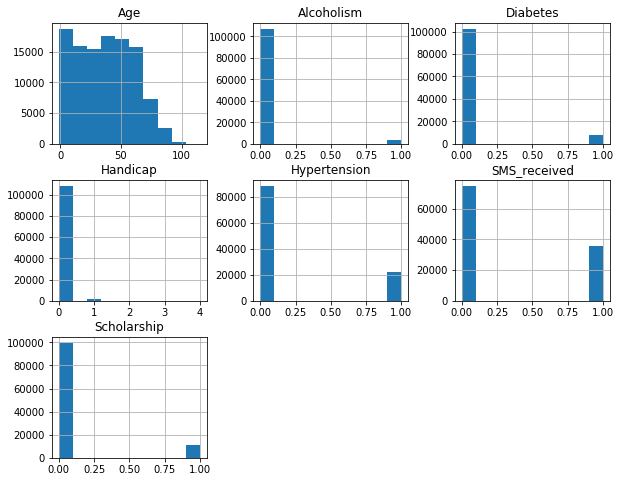

In [16]:
df.hist(figsize=(10,8));

From the histogram the age group is skewed to the right show that most are under 60. Overall, most of the patients don't have appointments for illnesses or disabilities. Hypertension is the illness that is being treated the most among the patients. Less than half of the patients are recieving SMS notifications.

In [17]:
SMSreceived = df.SMS_received == True
SMSnotreceived = df.SMS_received == False


In [18]:
df.Age[SMSreceived].mean()

37.513809819063184

In [19]:
df.Age[SMSnotreceived].mean()

36.887960556999133

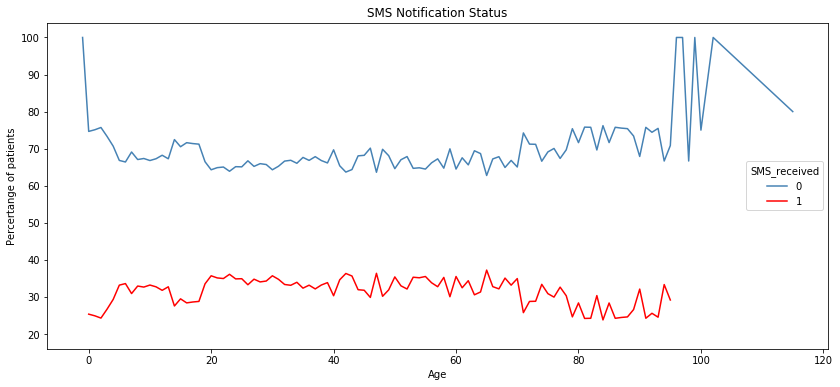

In [20]:
df.groupby('Age')['SMS_received'].value_counts(normalize=True).unstack('SMS_received').mul(100).plot(figsize=[14,6],color=['steelblue','r'])
plt.title('SMS Notification Status')
plt.ylabel('Percertange of patients');

About 35% of the patients did recieve a SMS notification and they are within the ages of 20-65. It looks like that age group would typically be more tech savy. Leaving 65% without SMS notifcation for their appointment. Most are under 20 or over 90 not reciving a notifcation.

In [21]:
df.groupby('No_show').No_show.count()

No_show
No     88208
Yes    22319
Name: No_show, dtype: int64

### What is the average number of No-show appointments?

By changing the data type of the No_show column to a numeric data type, we're able to compare it to the other types of numeric data. 

In [22]:
df['No_show'] = df['No_show'].str.replace('Yes', '1')
df['No_show'] = df['No_show'].str.replace('No','0')
df['No_show'] = pd.to_numeric(df['No_show'], errors='ignore')


In [23]:
df.No_show.mean()

0.20193255946510807

In [24]:
df.groupby('No_show').No_show.count()

No_show
0    88208
1    22319
Name: No_show, dtype: int64

The average number of No show appointments is 20%. With 88,208 showing for their appointments and 22,319 not showing.

In [25]:
NoShow = df.No_show == True
NotNoShow = df.No_show == False
df.Age[NoShow].mean()

34.317666562121957

In [26]:
df.Age[NotNoShow].mean()

37.790064393252315

The average age of a patient who is a "No show" is 34.

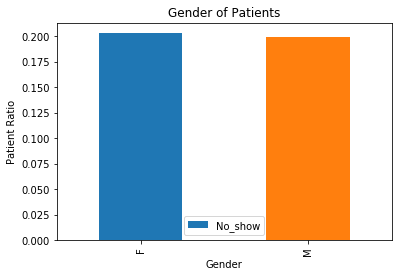

In [27]:
df.groupby('Gender').No_show.mean().plot(kind='bar')
plt.title('Gender of Patients')
plt.ylabel('Patient Ratio')
plt.legend();

In [28]:
df.groupby('Gender').No_show.count()

Gender
F    71840
M    38687
Name: No_show, dtype: int64

In [29]:
df.groupby('Gender')['No_show'].value_counts().unstack('Gender')

Gender,F,M
No_show,,
0,57246,30962
1,14594,7725


In [30]:
def Appointmentstatus(df, xVar, yVar='No_show'):
    data=df.groupby(xVar)[yVar].mean().mul(100)
    data.plot.bar(figsize=(14,6))
    xVar=xVar.replace("_", " ")
    yVar=yVar.replace("_"," ")
    plt.title(f'Percentage of {yVar} {xVar} patients'.title(), weight='bold')


Text(0,0.5,'Percentage of No Shows')

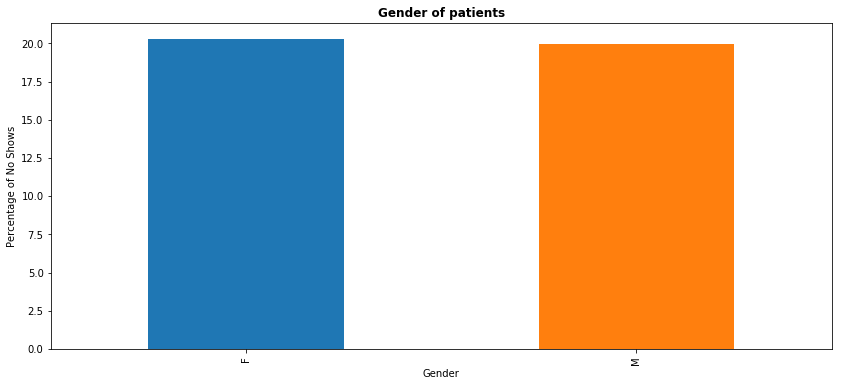

In [31]:
Appointmentstatus(df, 'Gender')
plt.title('Gender of patients', weight='bold')
plt.ylabel('Percentage of No Shows')

#Overriding title to show percentage of No show patients per gender

There are more female patients than male patients. More female patients are a No show than male patients. 

In [32]:
df.groupby('Handicap')['No_show'].value_counts(normalize=True).unstack('Handicap')

Handicap,0,1,2,3,4
No_show,,,,,
0,0.797647,0.820764,0.797814,0.769231,0.666667
1,0.202353,0.179236,0.202186,0.230769,0.333333


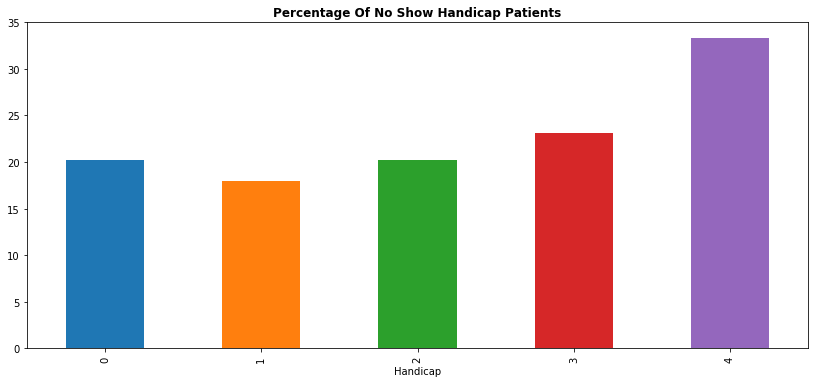

In [33]:
Appointmentstatus(df, 'Handicap')
#plt.title('Percentage of No-show Handicap Patients')

Based on the average number of No show appointments, most of the patient's are not handicap. 0=No and 1=yes. No means the patient is not a No show and Yes means that they are. Columns 2, 3, and 4 are representing that the patients are likely being treatedfor other illnesses outside of the Handicap scope that won't show if they are a No-show from this specific chart.

### If a patient has recieved a scholarship are they less likely to be a No-Show?

In [34]:
df.Scholarship[NoShow].mean()

0.11550696715802679

In [35]:
df.Scholarship[NotNoShow].mean()

0.093903047342644652

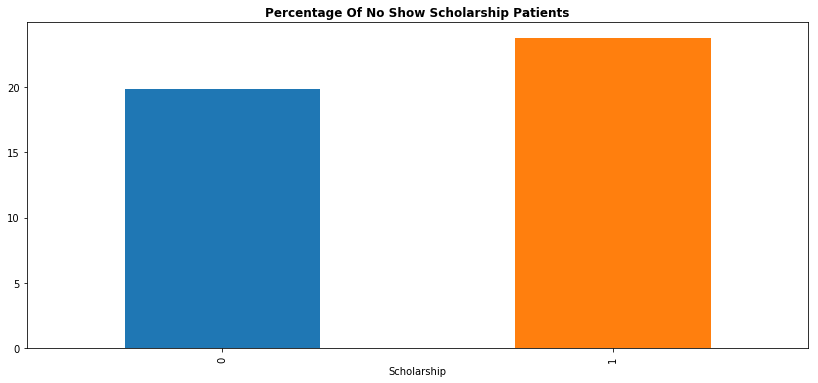

In [36]:
Appointmentstatus(df, 'Scholarship')

Based on the averages, there are more people that are both a No show and have not recieved a scholarship.

<a id='conclusions'></a>
## Conclusions

In conclusion, the patients of the healthcare facilities in Brazil range from ages 0-115 with most patients ranging between the average number of No-show appointments are 20%. We're able to see that the average age of a No-show patient is 18-55. From the analysis we're able to find that the age of someone who is a No-show is typically 34. The data shows that there are significatnly more female patients than male patients. With less than half of both genders being No-show patients, there are still more female patients that are No-shows. also we're able to find that if a patient recieves a scholarship they are less likely to miss their appointment. 

### Limitation

A limitation is the data is only showing appointments that are scheduled for 5/6/2016-6/6/2016. But the data is showing actual scheduled days for 2015. The dataset should include more information of a wider range of dates. By adding more dates that include more appointment days for a time frame that is consistent with scheduled days it will give a better understanding of times of year and days that the appointments are being cancelled the most as well as more patient information. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0